In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

In [4]:
S: int = 100

$N$: Number of points to generate

In [5]:
N: int = 500
N

500

In [6]:
class C:
    def __init__(self, x: float, y: float, r: float):
        self.x = x
        self.y = y
        self.r = r

    def is_in_point(self, x: float, y: float) -> bool:
        _d2: float = (self.x - x) ** 2 + (self.y - y) ** 2
        _r2: float = self.r ** 2
        return _d2 <= _r2

    # to string
    def __str__(self) -> str:
        return 'C({};{}):{}'.format(self.x, self.y, self.r)

    @staticmethod
    def gen_circ(r_x, r_y, r_r) -> 'C':
        return C(
            np.random.uniform(r_x[0], r_x[1]),
            np.random.uniform(r_y[0], r_y[1]),
            np.random.uniform(r_r[0], r_r[1])
        )

    @staticmethod
    def gen_example() -> np.array:
        return np.array([
            C.gen_circ((0, S / 2), (0, S / 2), (S / 10, S / 5)),
            C.gen_circ((S / 2, S), (0, S / 2), (S / 20, S / 10)),
            C.gen_circ((0, S / 2), (S / 2, S), (S / 15, S / 7)),
            C.gen_circ((S / 2, S), (S / 2, S), (S / 7, S / 5))
        ])

    @staticmethod
    def is_in_point_any(list_c: list, x: float, y: float) -> bool:
        for _c in list_c:
            if _c.is_in_point(x, y):
                return True
        return False


In [7]:
# generate circumference
vc = C.gen_example()

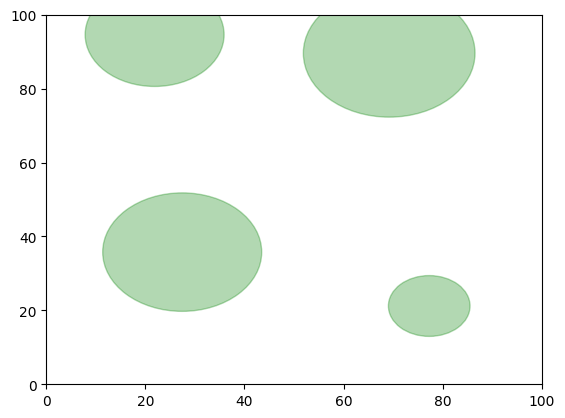

In [8]:
# plot circumference
def plot_circ(cs: list) -> None:
    fig, ax = plt.subplots()
    ax.set_xlim(0, S)
    ax.set_ylim(0, S)
    for c in cs:
        ax.add_patch(plt.Circle((c.x, c.y), c.r, color='g', alpha=.3))
    plt.show()


plot_circ(vc)

In [9]:
def generate_dataset() -> np.ndarray:
    _data_0: np.ndarray = np.ndarray(shape=(2, 0), dtype=np.float32)
    _data_1: np.ndarray = np.ndarray(shape=(2, 0), dtype=np.float32)
    # generate class 0
    while _data_0.shape[1] < N / 2:
        _x = np.random.uniform(0, S)
        _y = np.random.uniform(0, S)
        if C.is_in_point_any(vc, _x, _y):
            if _data_1.shape[1] < N / 2:
                _data_1 = np.append(_data_1, np.array([[_x], [_y]]), axis=1)
        else:
            _data_0 = np.append(_data_0, np.array([[_x], [_y]]), axis=1)
    # generate class 1
    while _data_1.shape[1] < N / 2:
        _c = np.random.choice(vc)
        _r = np.random.uniform(0, _c.r)
        _a = np.random.uniform(0, 2 * np.pi)
        _x = _c.x + _r * np.cos(_a)
        if _x < 0 or _x > S:
            continue
        _y = _c.y + _r * np.sin(_a)
        if _y < 0 or _y > S:
            continue
        _data_1 = np.append(_data_1, np.array([[_x], [_y]]), axis=1)

    _data: np.ndarray = np.append(_data_0, np.zeros(shape=(1, _data_0.shape[1])), axis=0)
    _data = np.append(_data, np.append(_data_1, np.ones(shape=(1, _data_1.shape[1])), axis=0), axis=1)
    return _data


data = generate_dataset()
data

array([[ 7.10360582,  2.02183974, 97.86183422, ..., 18.16168445,
        25.26418333, 81.43604307],
       [ 8.71292997, 83.26198455, 79.91585642, ..., 99.2136903 ,
        25.71676702, 22.12416438],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ]])

In [10]:
data.T

array([[ 7.10360582,  8.71292997,  0.        ],
       [ 2.02183974, 83.26198455,  0.        ],
       [97.86183422, 79.91585642,  0.        ],
       ...,
       [18.16168445, 99.2136903 ,  1.        ],
       [25.26418333, 25.71676702,  1.        ],
       [81.43604307, 22.12416438,  1.        ]])

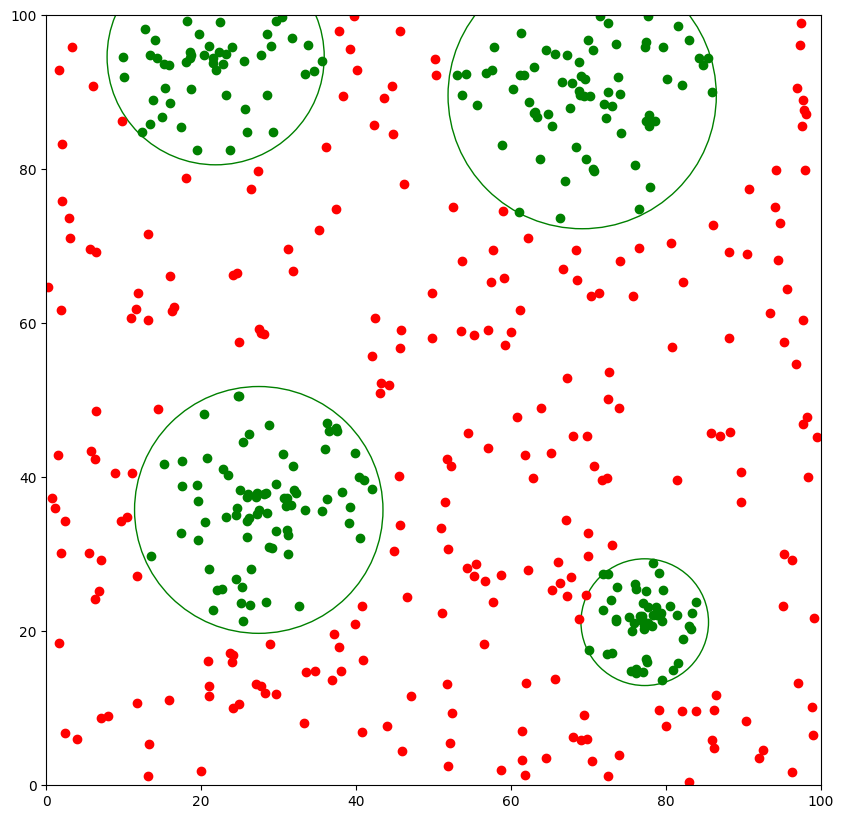

In [11]:
# Plot
def plot_circ_data(data_: np.ndarray) -> None:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, S)
    ax.set_ylim(0, S)

    ax.plot(data_[0, data_[2, :] == 0], data_[1, data_[2, :] == 0], 'o', color='red')
    ax.plot(data_[0, data_[2, :] == 1], data_[1, data_[2, :] == 1], 'o', color='green')
    for c in vc:
        ax.add_patch(plt.Circle((c.x, c.y), c.r, color='green', fill=False))
    plt.show()


plot_circ_data(data)

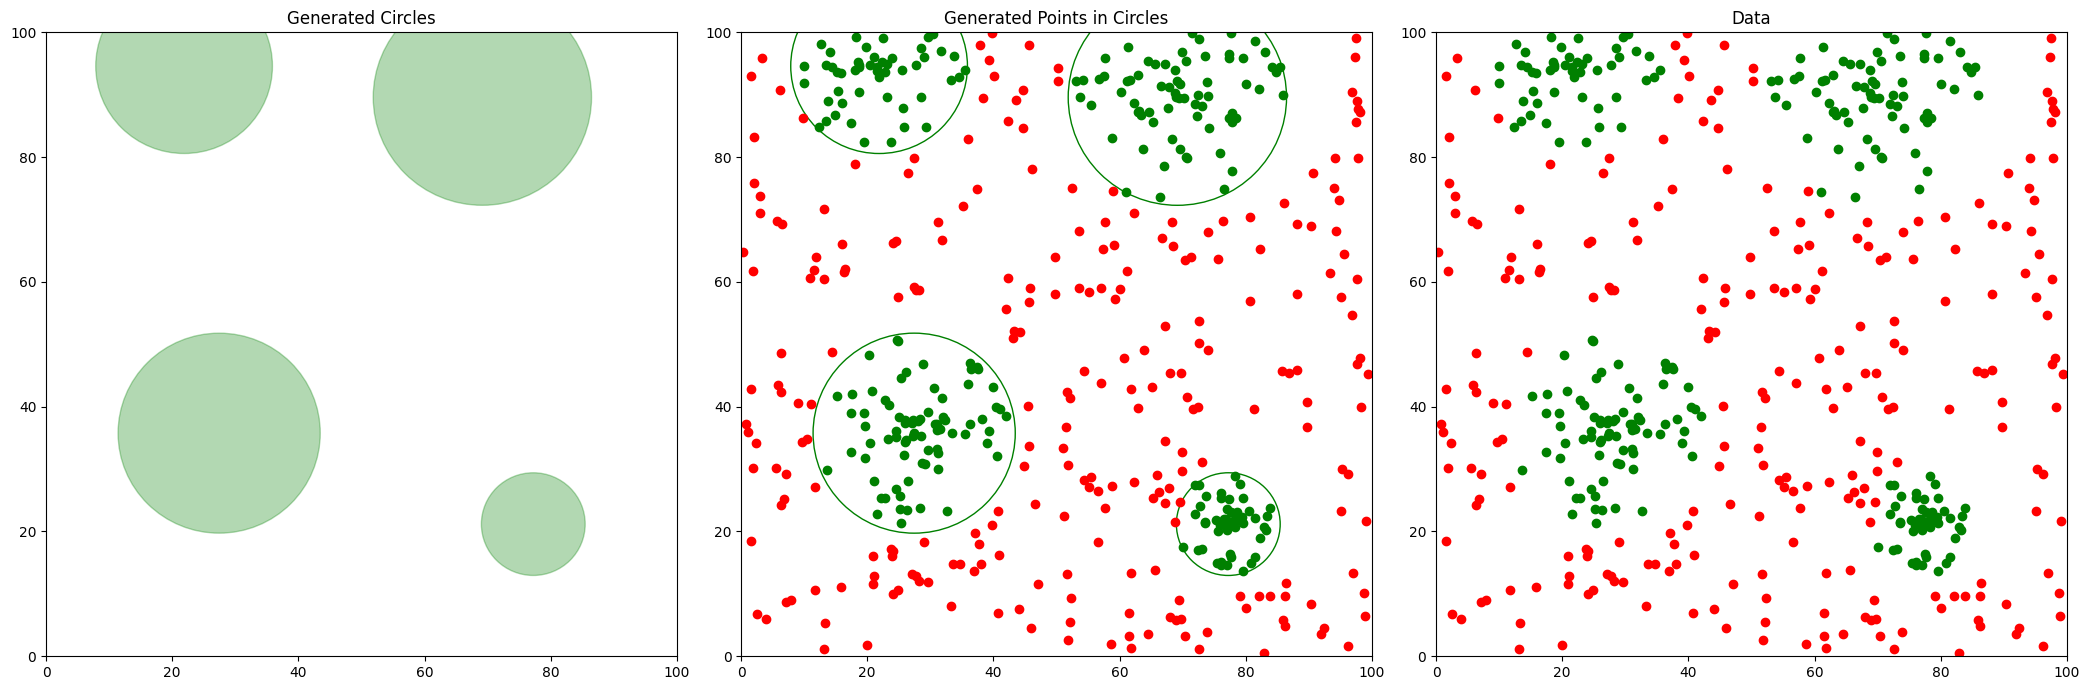

In [12]:
# Plot
def plot_circ_summary(data_: np.ndarray) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))
    for _axi in ax:
        _axi.set_xlim(0, S)
        _axi.set_ylim(0, S)

    ax[0].set_title('Generated Circles')
    ax[1].set_title('Generated Points in Circles')
    ax[2].set_title('Data')

    for i in [1, 2]:
        ax[i].plot(data_[0, data_[2, :] == 0], data_[1, data_[2, :] == 0], 'o', color='red')
        ax[i].plot(data_[0, data_[2, :] == 1], data_[1, data_[2, :] == 1], 'o', color='green')
    for c in vc:
        ax[0].add_patch(plt.Circle((c.x, c.y), c.r, color='green', alpha=.3))
        ax[1].add_patch(plt.Circle((c.x, c.y), c.r, color='green', fill=False))
    plt.tight_layout()
    plt.show()


plot_circ_summary(data)

In [13]:
# save data
np.savetxt('data.csv', data.T, delimiter=',')